In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Object Localization

### Creation of the dataset

The dataset for the problem of Object Localization will be created by adding one image from MNIST data at a random point in the 128x128 canvas.

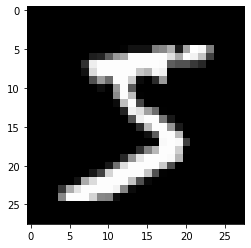

In [3]:
plt.imshow(x_train[0], cmap='gray')

plt.show()

In [4]:
def digit_to_canvas(img):
    rnd_row = np.random.randint(0, 100)
    rnd_col = np.random.randint(0, 100)
    canv = np.zeros((128, 128, 1))
    canv[rnd_row:rnd_row + 28, rnd_col:rnd_col + 28] = img
    return canv, (rnd_col + 14, rnd_row + 14)
    

def create_dataset(data, start_ind, end_ind):
    new_dataset = []
    labels = []
    for i in range(start_ind, end_ind):
        x_new, label = digit_to_canvas(data[i])
        new_dataset.append(x_new)
        labels.append(label)
        labels = labels
    return np.array(new_dataset), np.array(labels)/128.

In [5]:
#Creating the training dataset
x_train_new, y_train_pos = create_dataset(x_train, 0, 10000)
y_train_dig = y_train[:len(x_train_new)]
x_train_new = x_train_new / 255.0

In [6]:
#Creating the validation dataset
x_test_new, y_test_pos = create_dataset(x_train, 10000, 11000)
y_test_dig = y_train[10000:11000]
x_test_new = x_test_new /255.0

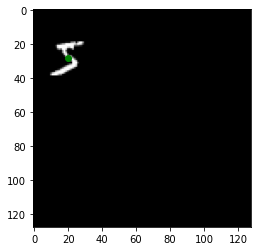

In [7]:
#Example of image where the green dot represents the ground truth for the object position
plt.imshow(x_train_new[0], cmap='gray')
plt.plot(y_train_pos[0][0] *128, y_train_pos[0][1] * 128, 'go')
plt.show()

In [55]:
#Creation of the model
inputs = tf.keras.Input(shape=(128, 128, 1))
x = tf.keras.layers.Conv2D(32, 3, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Conv2D(64, 3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D()(x)
x = tf.keras.layers.Flatten()(x)

classifier = tf.keras.layers.Dropout(0.3)(x)
classifier = tf.keras.layers.Dense(10, activation='softmax', name='digit_output')(classifier)

reg = tf.keras.layers.Dense(64, activation="relu")(x)
reg = tf.keras.layers.Dense(32, activation="relu")(reg)
reg = tf.keras.layers.Dense(2, activation='sigmoid', name='position_output')(reg)

model = tf.keras.Model(inputs, [classifier, reg])

In [56]:
model.summary()

Model: "model_11"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_34 (Conv2D)             (None, 126, 126, 32  320         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 max_pooling2d_34 (MaxPooling2D  (None, 63, 63, 32)  0           ['conv2d_34[0][0]']              
 )                                                                                         

In [57]:
model.compile(optimizer='adam',
              loss={'digit_output': 'sparse_categorical_crossentropy',
                    'position_output': 'mean_squared_error'},
              metrics=['accuracy'])

In [58]:
history = model.fit(x_train_new, [y_train_dig, y_train_pos], epochs=10, validation_data=(x_test_new, [y_test_dig, y_test_pos]))

Epoch 1/10
313/313 [==============================] - 55s 172ms/step - loss: 2.0571 - digit_output_loss: 2.0542 - position_output_loss: 0.0029 - digit_output_accuracy: 0.2288 - position_output_accuracy: 0.9676 - val_loss: 1.4402 - val_digit_output_loss: 1.4388 - val_position_output_loss: 0.0014 - val_digit_output_accuracy: 0.4640 - val_position_output_accuracy: 0.9590
Epoch 2/10
313/313 [==============================] - 53s 170ms/step - loss: 0.9837 - digit_output_loss: 0.9826 - position_output_loss: 0.0010 - digit_output_accuracy: 0.6535 - position_output_accuracy: 0.9734 - val_loss: 0.6236 - val_digit_output_loss: 0.6229 - val_position_output_loss: 7.3914e-04 - val_digit_output_accuracy: 0.7890 - val_position_output_accuracy: 0.9700
Epoch 3/10
313/313 [==============================] - 53s 170ms/step - loss: 0.4757 - digit_output_loss: 0.4750 - position_output_loss: 6.5444e-04 - digit_output_accuracy: 0.8425 - position_output_accuracy: 0.9763 - val_loss: 0.4307 - val_digit_output_lo

In [81]:
model.save('./model')

INFO:tensorflow:Assets written to: ./model\assets


INFO:tensorflow:Assets written to: ./model\assets


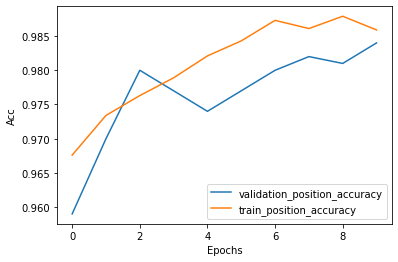

In [59]:
val_pos_acc = history.history['val_position_output_accuracy']
train_pos_acc = history.history['position_output_accuracy']

plt.plot(range(len(val_pos_acc)), val_pos_acc, label='validation_position_accuracy')
plt.plot(range(len(train_pos_acc)), train_pos_acc, label='train_position_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

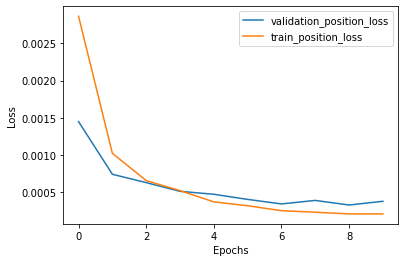

In [60]:
val_pos_loss = history.history['val_position_output_loss']
train_pos_loss = history.history['position_output_loss']
# Plot the validation loss
plt.plot(range(len(val_pos_loss)), val_pos_loss, label='validation_position_loss')
plt.plot(range(len(train_pos_loss)), train_pos_loss, label='train_position_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

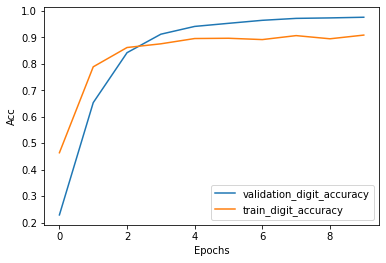

In [61]:
val_dig_acc = history.history['digit_output_accuracy']
train_dig_acc = history.history['val_digit_output_accuracy']

plt.plot(range(len(val_pos_acc)), val_dig_acc, label='validation_digit_accuracy')
plt.plot(range(len(train_pos_acc)), train_dig_acc, label='train_digit_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [62]:
x_val_new, y_val_pos = create_dataset(x_train, 11000, 11050)
y_val_dig = y_train[11000:11050]
x_val_new = x_val_new /255.0

1/1 [==============================] - 0s 76ms/step
Predicted: 6


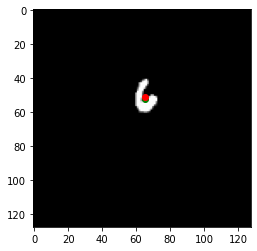

1/1 [==============================] - 0s 17ms/step
Predicted: 9


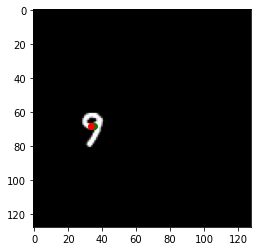

1/1 [==============================] - 0s 16ms/step
Predicted: 3


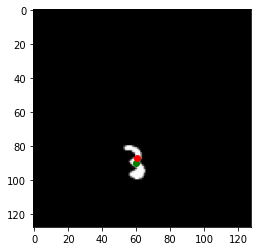

1/1 [==============================] - 0s 16ms/step
Predicted: 0


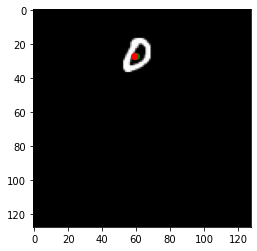

1/1 [==============================] - 0s 17ms/step
Predicted: 1


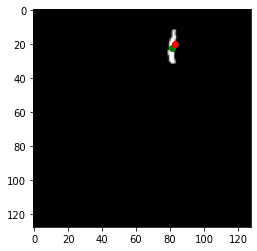

1/1 [==============================] - 0s 16ms/step
Predicted: 4


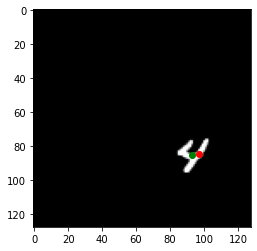

1/1 [==============================] - 0s 17ms/step
Predicted: 2


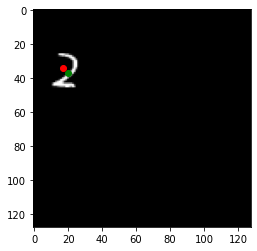

1/1 [==============================] - 0s 17ms/step
Predicted: 7


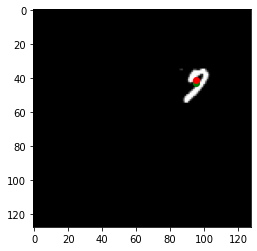

1/1 [==============================] - 0s 20ms/step
Predicted: 4


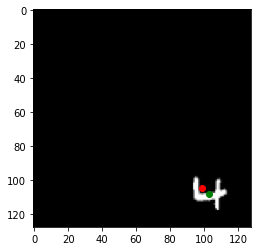

1/1 [==============================] - 0s 16ms/step
Predicted: 4


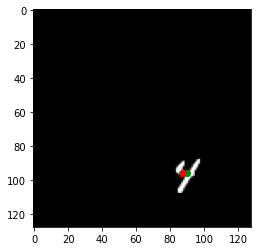

1/1 [==============================] - 0s 17ms/step
Predicted: 3


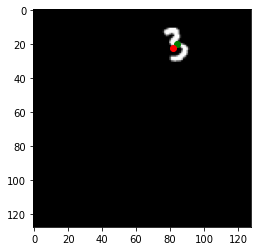

1/1 [==============================] - 0s 17ms/step
Predicted: 3


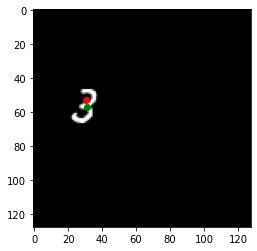

1/1 [==============================] - 0s 17ms/step
Predicted: 3


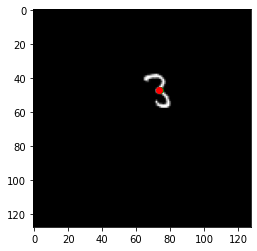

1/1 [==============================] - 0s 17ms/step
Predicted: 2


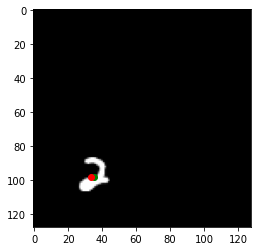

1/1 [==============================] - 0s 17ms/step
Predicted: 0


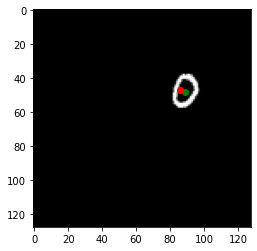

1/1 [==============================] - 0s 17ms/step
Predicted: 9


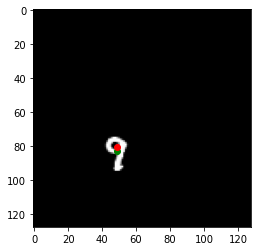

1/1 [==============================] - 0s 17ms/step
Predicted: 4


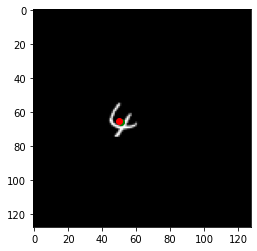

1/1 [==============================] - 0s 16ms/step
Predicted: 2


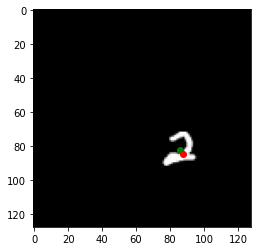

1/1 [==============================] - 0s 17ms/step
Predicted: 2


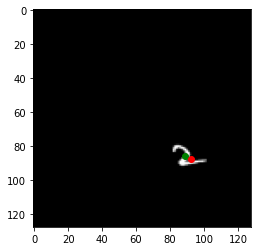

1/1 [==============================] - 0s 17ms/step
Predicted: 0


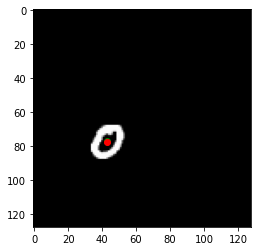

1/1 [==============================] - 0s 16ms/step
Predicted: 7


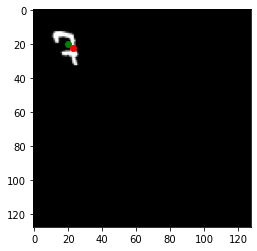

1/1 [==============================] - 0s 16ms/step
Predicted: 3


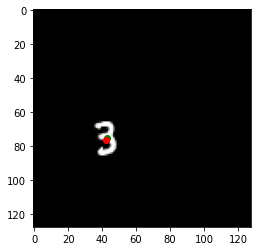

1/1 [==============================] - 0s 17ms/step
Predicted: 0


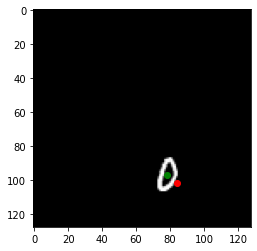

1/1 [==============================] - 0s 17ms/step
Predicted: 4


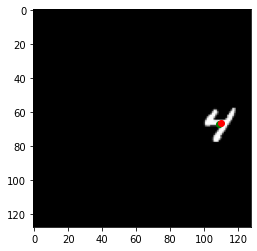

1/1 [==============================] - 0s 16ms/step
Predicted: 4


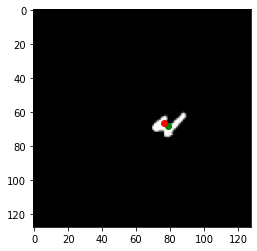

1/1 [==============================] - 0s 17ms/step
Predicted: 5


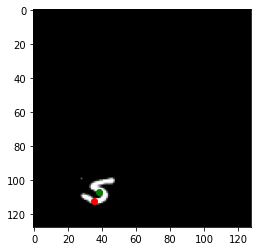

1/1 [==============================] - 0s 16ms/step
Predicted: 0


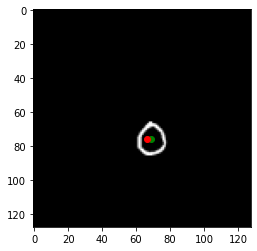

1/1 [==============================] - 0s 16ms/step
Predicted: 0


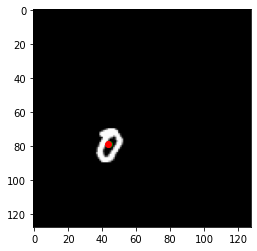

1/1 [==============================] - 0s 16ms/step
Predicted: 8


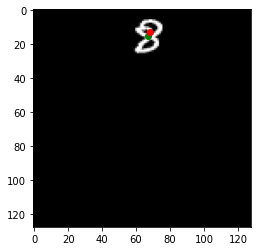

1/1 [==============================] - 0s 16ms/step
Predicted: 0


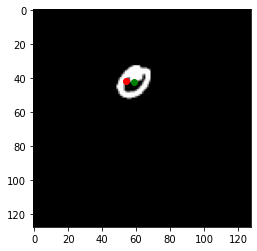

1/1 [==============================] - 0s 16ms/step
Predicted: 2


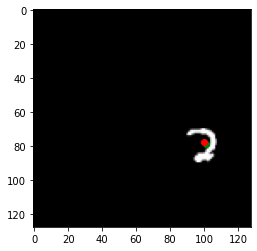

1/1 [==============================] - 0s 16ms/step
Predicted: 3


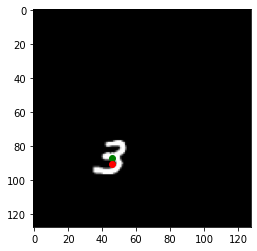

1/1 [==============================] - 0s 17ms/step
Predicted: 2


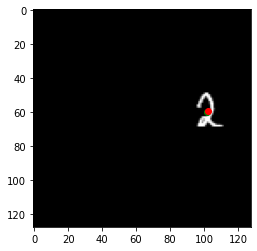

1/1 [==============================] - 0s 17ms/step
Predicted: 2


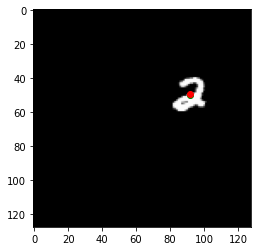

1/1 [==============================] - 0s 17ms/step
Predicted: 3


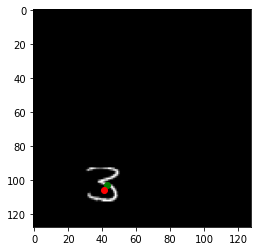

1/1 [==============================] - 0s 16ms/step
Predicted: 8


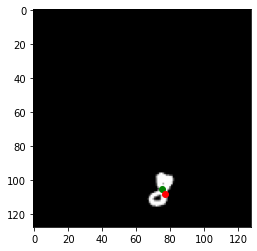

1/1 [==============================] - 0s 16ms/step
Predicted: 0


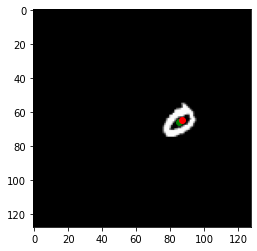

1/1 [==============================] - 0s 16ms/step
Predicted: 3


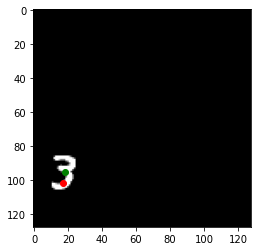

1/1 [==============================] - 0s 16ms/step
Predicted: 6


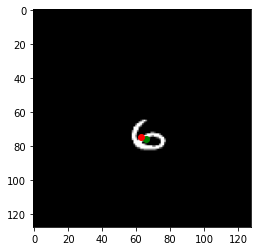

1/1 [==============================] - 0s 16ms/step
Predicted: 3


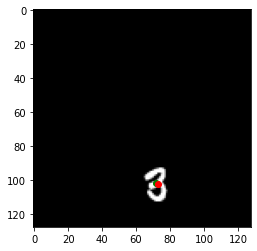

1/1 [==============================] - 0s 17ms/step
Predicted: 4


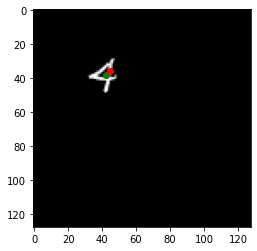

1/1 [==============================] - 0s 18ms/step
Predicted: 0


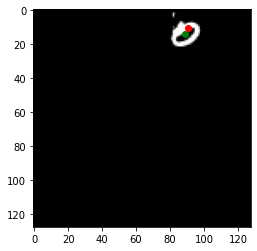

1/1 [==============================] - 0s 18ms/step
Predicted: 3


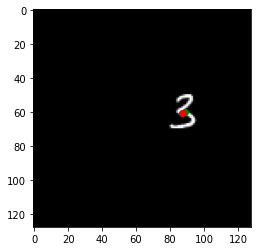

1/1 [==============================] - 0s 16ms/step
Predicted: 1


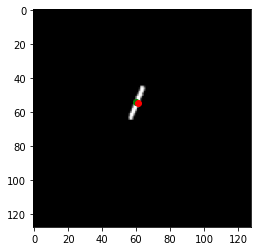

1/1 [==============================] - 0s 16ms/step
Predicted: 2


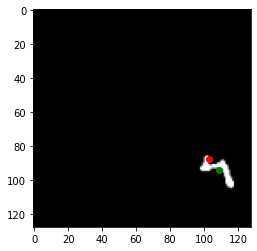

1/1 [==============================] - 0s 16ms/step
Predicted: 0


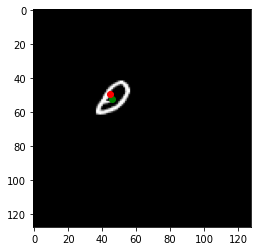

1/1 [==============================] - 0s 17ms/step
Predicted: 4


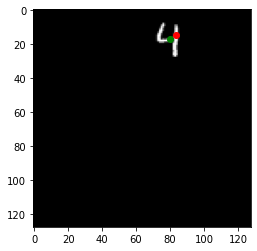

1/1 [==============================] - 0s 16ms/step
Predicted: 1


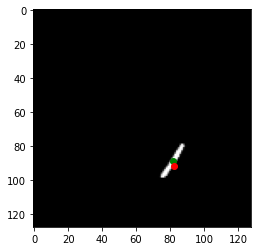

1/1 [==============================] - 0s 17ms/step
Predicted: 6


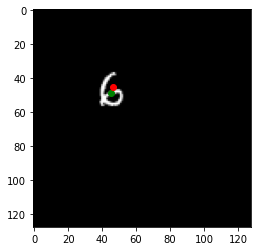

1/1 [==============================] - 0s 16ms/step
Predicted: 7


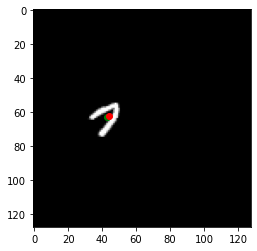

In [63]:
#Visualisation of the model performance
for i in range(x_val_new.shape[0]):
    temp = np.expand_dims(x_val_new[i], axis=0)
    t1, t2 = model.predict(temp)
    print(f"Predicted: {np.argmax(t1)}")
    plt.imshow(x_val_new[i], cmap='gray')

    plt.plot(y_val_pos[i][0] *128, y_val_pos[i][1] * 128, 'go')
    plt.plot(t2[0][0] *128,t2[0][1] * 128, 'ro')
    plt.show()